# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План исследования:
1. Ознакомление с данными
2. Предобработка данных 
    - Названия столбцов
    - Работа с пропусками
    - Работа с типами данных
    - Обработка неявных дубликатов
    - Поиск и работа с аномалиями
3. Добавление новые столбцы по заданию
  - Цена одного квадратного метра
  - День публикации объявления (0 - понедельник, 1 - вторник и т.д.)
  - Месяц публикации объявления
  - Год публикации объявления
  - Тип этажа квартиры (значения — «первый», «последний», «другой»)
  - Расстояние в км до центра города
4. Исследовательский анализ, изучение параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
5. Исследовательский анализ
   - Как быстро продавались квартиры?
   - Какие факторы больше всего влияют на общую (полную) стоимость объекта?
   - Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
   - Расчет средней цены каждого километра в Санкт-Петербурге.
6. Общий вывод   

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
path = 'C:/Users/fedos/practicum/'
df = pd.read_csv((path + 'real_estate_data.csv') ,sep='\t') # загрузим наши данные



In [3]:
df.head(30) # посмотрим на нашу таблицу

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Нам представлены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. На первый взгляд бросаются в глаза довольно-таи много пропусков, в столобце 'first_day_exposition' указана дата и время, хотя данные по времени не заполнены. Значения в столбцах 'last_price', 'floors_total', 'balcony', 'airports_nearest','cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' надо бы округлить до целых чисел. Столбец 'is_apartment', видимо, заполняли пропуском, если квартира не являлась апартаментами.

In [4]:
df.info() #посмотрим информацию о типах данных и их количестве

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.duplicated().sum() #посмотрим, есть ли дубликаты

0

In [6]:
df.describe() #Посмотрим характеристики, дающие представление о выборке

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим, что у нас есть слишком большое или большие по площади помещения (900), высота потолков 100 и 1 - это явно какая-то ошибка, общее количество этажей в доме - 60 (В СПб нет жилых домов этажностью больше 37 этажей) и еще 1580 дней в графе 'days_exposition'.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

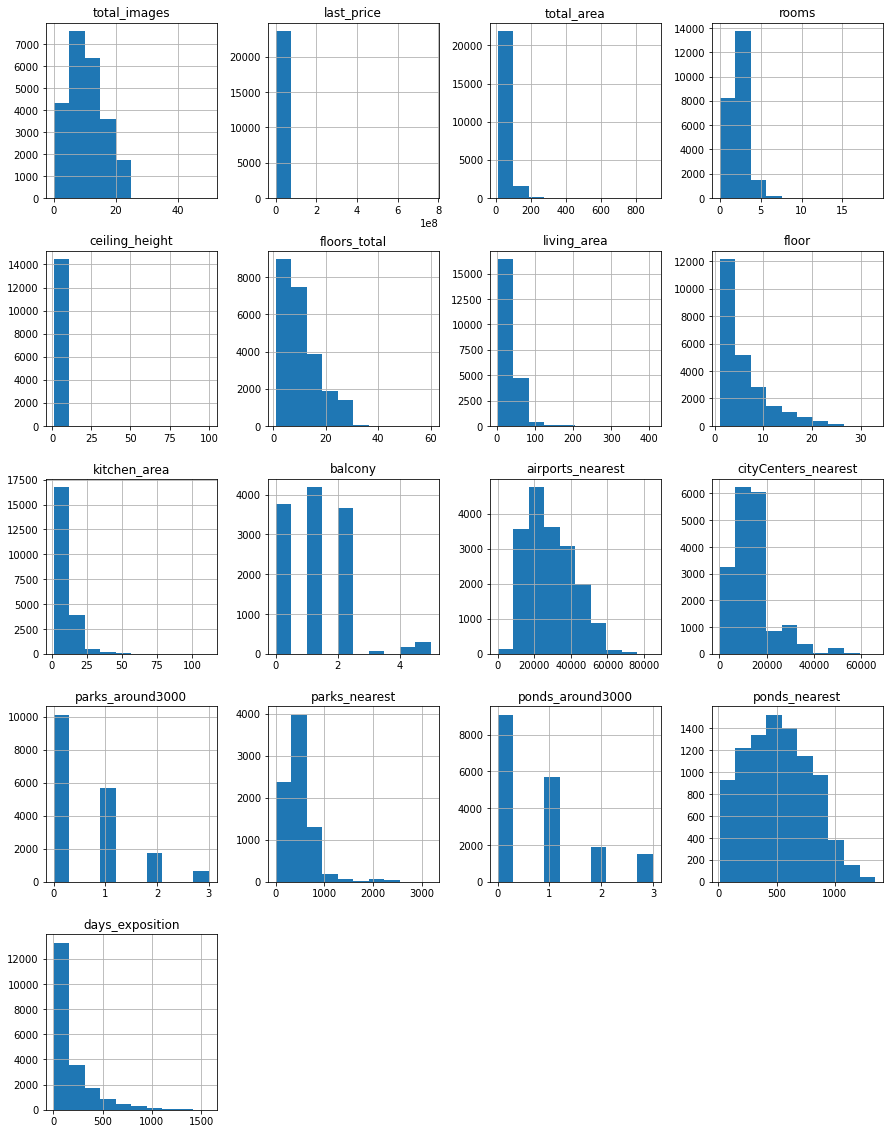

In [7]:
df.hist(figsize=(15, 20)) # Построим гистограммы для каждого вида данных

### Предобработка данных

Перед началом предобработки зафиксируем форму нашего датафрейма, чтобы после сравнить.

In [8]:
shape = df.shape
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])


DataFrame Shape : (23699, 22)
Number of rows : 23699
Number of columns : 22


**Приведем название столбца 'cityCenters_nearest' к змеиному регистру.**

In [9]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

**Поработаем с пропусками**

In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Скорее всего, если не указано число балконов, то их попросту нет, заполним пропуски на 0.
Пропуски в данных об апартаментах заполнм на False, так как пропусков очень много и, видимо, эту графу заполняли только те, кто продавал именно апартаменты, следовательно пропуск значит False.

In [11]:
df['balcony']=df['balcony'].fillna(0)
df['is_apartment']=df['is_apartment'].fillna(False)

Обработаем пропуски в данных в столбцах living_area и kitchen_area. В большинстве случаев, чем больше квартира тем больше и жилая площадь и кухня, то есть можно предположить, что есть зависимость площади жилой и кухни от общей площади. Заполним пропуски в этих данных средним процентом отношения общей площади к площади жилой и кухни соответственно.

In [12]:
living_area_mean = (df['living_area'] / df['total_area']).mean()  #находим средний процент отношения общей площади к площади жилой
kitchen_area_mean = (df['kitchen_area'] / df['total_area']).mean() #находим средний процент отношения общей площади к площади кухни


In [13]:
df['living_area']=df['living_area'].fillna(df['total_area']*living_area_mean) #заполняем пропуски средними значениями отношения площадей
df['kitchen_area']=df['kitchen_area'].fillna(df['total_area']*kitchen_area_mean)

Данные по высоте потолков я решила заполнить средним.

In [14]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())

In [15]:
df.dropna(subset=['floors_total'], inplace=True)

In [16]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Поработаем над типом данных**

Несколько видов данных имеют не соответствующий тип, приведем их к нужному типу:
1   last_price             float64 - int (цена картиры указывается в целых рублях, лишние цифры после запятой нам не к чему)
2   first_day_exposition   object  - datetime64 (дата публикации - это дата)
3   floors_total           float64 - int (количество этажей - целое число)
4   is_apartment           object  - bool (утверждение или отрицание - булев вид)
5   balcony                float64 - int (количество балконов - целое число)
6   days_exposition        float64 - int (сколько дней было размещено объявлени - целое число)
7   parks_around3000       float64 - int (число парков -целое число)
8   ponds_around3000       float64 - int (число водоемов -целое число)

In [17]:
df['last_price'] = df['last_price'].astype(int)
df['last_price'] = df['last_price']/1000 #переведем цену в тысячи
df=df.round({'last_price':2})
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT')
df=df.round({'floors_total':2})
df=df.round({'ceiling_height':2})
df=df.round({'living_area':2})
df=df.round({'kitchen_area':2})
df=df.round({'airports_nearest':2})
df=df.round({'cityCenters_nearest':0})
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = df['balcony'].astype(int)
df['days_exposition'] = df['days_exposition'].convert_dtypes()#преобразуем столбцы в наиболее подходящий тип данных,
#удалить пропуски мы не можем, так как их процент нам не позволяет это сделать, но работать с этим столбцом нам придется.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

**Поработаем над поиском неявных дубликатов**

In [19]:
df['locality_name'].unique() #посмотрим какие уникальные значения населенных пунктов в наших данных


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [20]:
df['locality_name'].nunique() #перед работой над неявными дубликатами, посмотрим сколько было уникальных значений

364

In [21]:
df['locality_name'] = df['locality_name'].str.lower() #приведем названия населенных пунктов к строковым буквам
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')# заменим букву ё на букву е, так как сразу видно, что во многих случаях она пишется то так, то так
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')#заменим часто встречающееся, взаимозаменяемые обозначения типа населенного пунка
df['locality_name'] = df['locality_name'].str.replace('городской поселок ', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок мурино', 'мурино')#и упростим названия поселка Мурино, избежав тем самым несколько неявных дубликатов
df['locality_name'] = df['locality_name'].str.replace('поселокбольшая ижора', 'поселок большая ижора')# так же я заметила, что неоднократно поселок 'слился' с названием
df['locality_name'] = df['locality_name'].str.replace('поселокбудогощь', 'поселок будогощь')
df['locality_name'] = df['locality_name'].str.replace('поселоквиллози', 'поселок виллози')
df['locality_name'] = df['locality_name'].str.replace('поселоклесогорский', 'поселоклесогорский')
df['locality_name'] = df['locality_name'].str.replace('поселокмга', 'поселок мга')
df['locality_name'] = df['locality_name'].str.replace('поселокназия', 'поселок назия')
df['locality_name'] = df['locality_name'].str.replace('поселокновоселье', 'поселок новоселье')
df['locality_name'] = df['locality_name'].str.replace('поселокпавлово', 'поселок павлово')
df['locality_name'] = df['locality_name'].str.replace('поселокрощино', 'поселок рощино')
df['locality_name'] = df['locality_name'].str.replace('поселоксвирьстрой', 'поселок свирьстрой')
df['locality_name'] = df['locality_name'].str.replace('поселоксоветский', 'поселок советский')
df['locality_name'] = df['locality_name'].str.replace('поселокфедоровское', 'поселок федоровское')
df['locality_name'] = df['locality_name'].str.replace('поселокянино-1', 'поселок янино-1')

In [22]:
set(df['locality_name'].unique()) # для наглядности поиска неявных дубликатов список уникальных значений можно отсортировать в алфавитном порядке

{nan,
 'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'деревня извара',
 'деревня иссад',
 'деревня калитино',
 'деревня кальтино',
 'деревня камышовка',
 'деревня каськово',
 'деревня келози',
 'деревня кипень',
 'деревня кисельня',
 'деревня колтуши',
 'деревня коркино',
 'деревня котлы',
 'деревня кривко',
 'деревня кудрово',
 'деревня кузьмолово',
 'деревня курковицы',
 'деревня куровицы',
 'деревня куттузи',
 'деревня лаврики',
 'д

In [23]:
df['locality_name'].nunique()

322

Уникальных значений населенных пунктов стало 322, а было 364. Результат - 42 пункта нашли свое место.
Пропуски в значениях населенных пунктов предлагаю удалить, так как их у нас всего 49, что составляет 0,2 процента от данных.

In [24]:
df = df.dropna(subset=['locality_name'])

**Поработаем над редкими и выбивающимися значениями (аномалиями).**


In [25]:
df['ceiling_height'].sort_values(ascending=False).head(30) # отсортируем данные по столбцу высота потолков в порядке убывания.

22869    100.0
3148      32.0
22336     32.0
21377     27.5
5807      27.0
5246      27.0
10773     27.0
17857     27.0
21824     27.0
20478     27.0
22938     27.0
4876      27.0
5669      26.0
11285     25.0
18545     25.0
6246      25.0
355       25.0
4643      25.0
9379      25.0
14382     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
17442      8.0
3474       8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [26]:
df.groupby('ceiling_height').count()

,total_images,last_price,total_area,first_day_exposition,rooms,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
ceiling_height,,,,,,,,,,,,,,,,,,,,,
1.00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1
1.75,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2.00,11,11,11,11,11,11,11,11,11,11,...,11,11,11,3,3,3,2,3,2,8
2.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26.00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
27.00,8,8,8,8,8,8,8,8,8,8,...,8,8,8,3,3,3,0,3,2,7
27.50,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,1


Мы видим , что у нас присутствуют аномально большие значения высоты потолков, возможно при заполнении была допущена опечатка и потолки выше 20 метров предлагаю считать 2 метра + соответственно значениям. Для этого поделим все высоты потолков больше и равные 20 на 10.

In [27]:
pd.options.mode.chained_assignment = None
df['ceiling_height'] =(df['ceiling_height'] / 10). where(df['ceiling_height'] >= 20, df['ceiling_height'] )

Данные с потолками более 8 метров и менее 2 предлагаю удалить. 

In [28]:
df = df.drop(df[df['ceiling_height'] > 8].index)
df = df.drop(df[df['ceiling_height'] < 2].index)
df.groupby('ceiling_height').count()

,total_images,last_price,total_area,first_day_exposition,rooms,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
ceiling_height,,,,,,,,,,,,,,,,,,,,,
2.00,12,12,12,12,12,12,12,12,12,12,...,12,12,12,4,4,4,3,4,2,8
2.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1
2.25,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1
2.26,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,1
2.30,4,4,4,4,4,4,4,4,4,4,...,4,4,4,1,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.50,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
5.60,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5.80,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>
1,7,3350.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900.0,159.00,2015-07-24,3,2.65,14.0,89.80,9,False,...,29.79,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,False,...,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,<NA>
23695,14,3100.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,...,8.50,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,...,10.62,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
23697,13,11475.0,76.75,2017-03-28,2,3.00,17.0,43.35,12,False,...,23.30,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Посмотрим, что у нас с данными по количеству этажей.
Пропуски по количеству этажей можно удалить, их всего 86, что составляет 0,57 процентов от данных.
Так же проверим, что у нас там со значениями.

In [30]:
df.dropna(subset=['floors_total'], inplace=True)
df.groupby('floors_total').count()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
floors_total,,,,,,,,,,,,,,,,,,,,,
1.0,25,25,25,25,25,25,25,25,25,25,...,25,25,25,6,6,6,1,6,4,20
2.0,380,380,380,380,380,380,380,380,380,380,...,380,380,380,82,82,82,46,82,50,297
3.0,667,667,667,667,667,667,667,667,667,667,...,667,667,667,376,375,376,244,376,259,549
4.0,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193,...,1193,1193,1193,900,900,900,519,900,595,981
5.0,5774,5774,5774,5774,5774,5774,5774,5774,5774,5774,...,5774,5774,5774,3713,3718,3718,2032,3718,1827,4908
6.0,910,910,910,910,910,910,910,910,910,910,...,910,910,910,809,810,810,537,810,532,753
7.0,589,589,589,589,589,589,589,589,589,589,...,589,589,589,516,521,521,338,521,299,477
8.0,388,388,388,388,388,388,388,388,388,388,...,388,388,388,324,324,324,208,324,190,325
9.0,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758,...,3758,3758,3758,3189,3189,3189,1221,3189,1288,3299


Самое большое количество этажей в жилых домах СПб и ЛО - 37, поэтому данные со значениями 52 и 60 предлагаю удалить

In [31]:
df = df.drop(df[df['floors_total'] > 37].index)


Также предлагаю удалить аномально маленькие значения жилой площади до 10 кв метров

In [32]:
df = df.drop(df[df['living_area'] < 10].index)

In [33]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5521
city_centers_nearest     5498
parks_around3000         5497
parks_nearest           15515
ponds_around3000         5497
ponds_nearest           14510
days_exposition          3168
dtype: int64

По завершении предобработки данных, посмотрим снова на размер нашего датафрейма, сравнив с исходным, вычислим какая доля от изначального количества данных осталась после предобработки.

In [34]:
shape_after = df.shape #создадим новую переменную с размером датафрейма после предобработки
print('DataFrame Shape :', shape,shape_after)
print('Number of rows :', shape[0],shape_after[0],shape_after[0]/shape[0] ) #посчитаем долю от изначального количества строк датафрейма
print('Number of columns :', shape[1],shape_after[1],shape_after[1]/shape[1])#посчитаем долю от изначального количества столбцов датафрейма

DataFrame Shape : (23699, 22) (23525, 22)
Number of rows : 23699 23525 0.9926579180556142
Number of columns : 22 22 1.0


***На этапе предобработки данных я ознакомилась с данными, определила пропущенные значения, приняла решение какие значения могу удалить, какие рассчитать, какие заменить. Удалила пропуски в столбцах 'locality_name', 'floors_total'. Заменила на среднее значение пропуски в данных 'celling_heigth', заполнила пропуски в 'living_area' средними данными по общей и жилой площади. Заменила пропуски в 'is_apartment' на False, в 'balcony' на 0. Так же поработала с аномальными значениями, заменила данные в 'celling_heigth' и удалила некоторые выбросы. В 'floors_total' удалила значения, не свойственные СПБ. В 'living_area' так же удалила аномальные значения. Поработала над типом данных. Явных дубликатов не обнаружила и поработала над неявными дубликатами. После предобработки данных мы сохранили более более 99% от наших данных.***

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу столбец с ценой за 1 кв метр

In [35]:
df['price_square_meter'] = df['last_price'] / df['total_area'] #рассчитали цену 1 кв метра и добавили новый столбец в таблицу
df=df.round({'price_square_meter':2})#округлили значения до 2х знаков после запятой

Добавим в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [36]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Добавим в таблицу: месяц публикации объявления

In [37]:
df['month'] = df['first_day_exposition'].dt.month

Добавим в таблицу: год публикации объявления

In [38]:
df['year'] = df['first_day_exposition'].dt.year

Проведем категоризацию данных и добавим в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [39]:
def categorize_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [40]:
df['categorize_floor'] = df.apply(categorize_floor, axis=1)

Посчитаем и добавим в таблицу: расстояние в км до центра города

In [41]:
df['city_centers_km'] = df['city_centers_nearest'] / 1000

Проверим, что получилось.

In [42]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,categorize_floor,city_centers_km
0,20,13000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,<NA>,120.37,3,3,2019,другой,16.028
1,7,3350.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,18.603
2,10,5196.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,13.933
3,0,64900.0,159.00,2015-07-24,3,2.65,14.0,89.80,9,False,...,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,6.800
4,2,10000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,8.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,False,...,796.0,3.0,381.0,<NA>,72.49,1,3,2017,другой,4.232
23695,14,3100.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,...,NaN,NaN,NaN,45.0,52.54,0,1,2018,другой,NaN
23696,18,2500.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,...,NaN,NaN,NaN,<NA>,44.09,6,2,2018,первый,NaN
23697,13,11475.0,76.75,2017-03-28,2,3.00,17.0,43.35,12,False,...,173.0,3.0,196.0,602.0,149.51,1,3,2017,другой,10.364


### Проведите исследовательский анализ данных

Для анализа параметров нам пригодится таблица с характеристиками, дающими представление о выборке

In [43]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,city_centers_km
count,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,...,18028.000000,8010.000000,18028.000000,9015.000000,20357.000000,23525.000000,23525.000000,23525.000000,23525.000000,18027.000000
mean,9.877917,6540.953861,60.359540,2.071881,2.697529,10.668140,34.600709,5.876047,10.561756,0.593751,...,0.611327,490.460674,0.769081,518.256794,180.828020,99.335304,2.567736,6.402083,2017.370627,14.194293
std,5.680474,10912.784814,35.664912,1.078682,0.229399,6.578028,22.340564,4.868613,6.086710,0.960548,...,0.802157,341.385822,0.938317,277.666279,219.859546,50.246817,1.788029,3.492527,1.037584,8.613305
min,0.000000,12.190000,12.000000,0.000000,2.000000,1.000000,10.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,0.110000,0.000000,1.000000,2014.000000,0.181000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,76.540000,1.000000,3.000000,2017.000000,9.238000
50%,9.000000,4650.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,1.000000,503.000000,95.000000,94.970000,3.000000,6.000000,2017.000000,13.098000
75%,14.000000,6799.000000,69.800000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,114.130000,4.000000,10.000000,2018.000000,16.289000
max,50.000000,763000.000000,900.000000,19.000000,8.000000,36.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1907.500000,6.000000,12.000000,2019.000000,65.968000


**Изучим параметр - жилая площадь, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

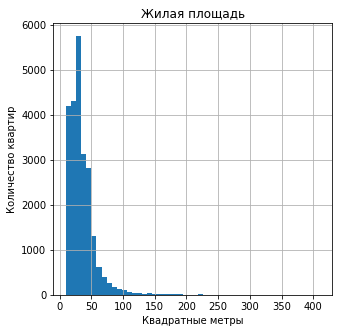

In [44]:
df['living_area'].hist(bins=50,figsize=(5, 5),range = (10, 410) )
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')


Мы видим, что чаще всего встречаются объявления о продаже квартир с жилой площадью примерно 30 кв метров, очень редко с жилой площадью более 100 кв метров. В основном жилая площадь в диапазоне от 10 до 55 кв метров. 

**Изучим параметр - общая площадь, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

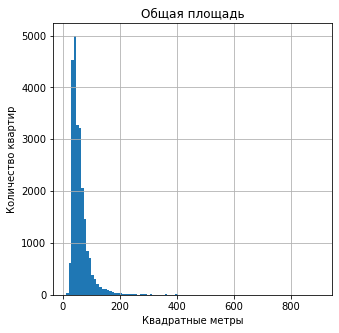

In [45]:
df['total_area'].hist(bins=100,figsize=(5, 5))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Мы видим, что чаще всего встречаются объявления о продаже квартир с общей площадью примерно 50 кв метров, очень редко с общей площадью более 150 кв метров. В основном общая площадь в диапазоне от 30 до 80 кв метров. 

**Изучим параметр - площадь кухни, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

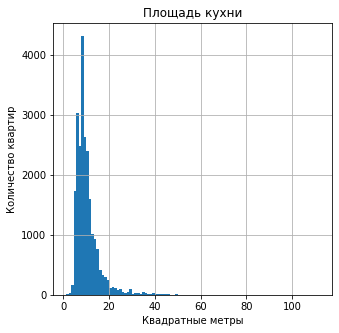

In [46]:
df['kitchen_area'].hist(bins=100,figsize=(5, 5))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Гистограмма показывает, что чаще всего встречаются объявления о продаже квартир с площадью кухни примерно 9 кв метров, очень редко с общей площадью более 20 кв метров. В основном общая площадь в диапазоне от 5 до 15 кв метров. 

**Изучим параметр - цена объекта, построим гистограмму.** Ограничим гистограмму значением стоимости 100 млн руб, так как далее идет сильное отклонение от средней стоимости квартир и нам для наглядности графика они будут мешать. 

Text(0, 0.5, 'Количество квартир')

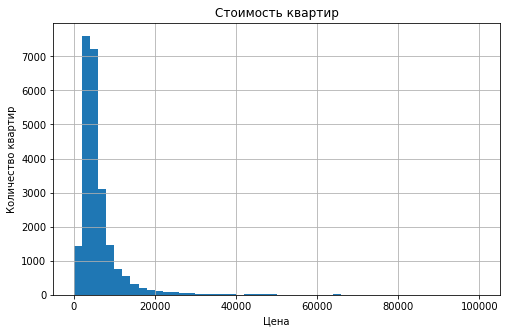

In [47]:
df['last_price'].hist(bins=50,figsize=(8, 5), range=(12,100000))
plt.title('Стоимость квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

Гистограмма показывает, что больше всего предложений по стоимости примерно от 5 млн руб до 8 млн руб, есть какая-то аномально дешевая жилплощать за 12 тыс руб и редко встречается недвижимость стоимостью более 20 млн руб.

**Изучим параметр - количество комнат, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

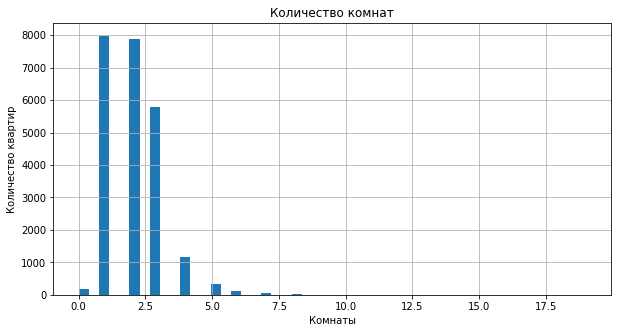

In [48]:
df['rooms'].hist(bins=50,figsize=(10, 5),range=(0,19))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')

Гистограмма показывает, что наибольшее количество объявлений с однокомнатными квартирами (8000), далее чуть отстают двухкомнатные (7900), трехкомнатных меньше (5800), четырехкомнатных мало (1200) 5-ти и более совсем мало, менее 4000 каждого вида.Из таблицы discribe мы видим. что у нас есть помещения с аномально больших количеством комнат - 19, и с комнатами в количестве 0 (возможно это квартиры-студии...) Если сделать группировку данных по столбцу комнат (см ниже), то увидим, что с количеством комнат 0 у нас 192 помещения, скорее всего это действительно квартиры-студии.

In [49]:
df.groupby('rooms').count()

,total_images,last_price,total_area,first_day_exposition,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,categorize_floor,city_centers_km
rooms,,,,,,,,,,,,,,,,,,,,,
0,192,192,192,192,192,192,192,192,192,192,...,27,116,67,178,192,192,192,192,192,116
1,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,...,2248,5828,2811,7211,7979,7979,7979,7979,7979,5828
2,7886,7886,7886,7886,7886,7886,7886,7886,7886,7886,...,2656,5878,2819,6862,7886,7886,7886,7886,7886,5878
3,5778,5778,5778,5778,5778,5778,5778,5778,5778,5778,...,2194,4667,2378,4786,5778,5778,5778,5778,5778,4666
4,1171,1171,1171,1171,1171,1171,1171,1171,1171,1171,...,559,1050,620,932,1171,1171,1171,1171,1171,1050
5,325,325,325,325,325,325,325,325,325,325,...,194,300,192,251,325,325,325,325,325,300
6,104,104,104,104,104,104,104,104,104,104,...,68,101,73,76,104,104,104,104,104,101
7,59,59,59,59,59,59,59,59,59,59,...,38,57,38,37,59,59,59,59,59,57
8,12,12,12,12,12,12,12,12,12,12,...,11,12,8,11,12,12,12,12,12,12


**Изучим параметр - высота потолков, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

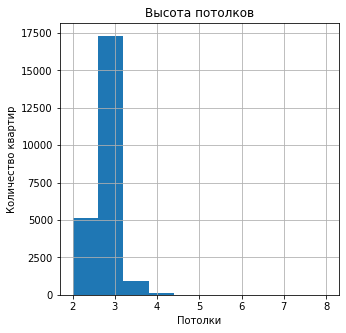

In [50]:
df['ceiling_height'].hist(bins=10,figsize=(5, 5),range=(2,8))
plt.title('Высота потолков')
plt.xlabel('Потолки')
plt.ylabel('Количество квартир')

Наиболее часто встречается высота потолков от 2,7 до 3,2 метров и крайне редко более 4,5 метров (скорее всего это какая-то загородная недвижимость, а не квартира в городе).

**Изучим параметр - этаж квартиры, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

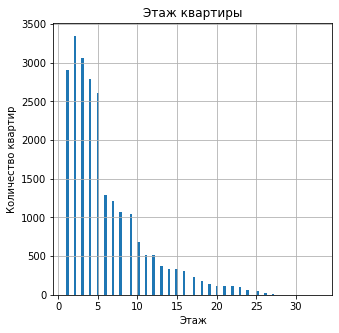

In [51]:
df['floor'].hist(bins=100,figsize=(5, 5),range=(1,33))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Больше всего квартиры в объявлениях на 2 атаже, далее идут- 3,1,4,5. Значительно меньше предложений по 6,7,8,9,10 этажам соответственно. Далее идут наравне 11 и 12 этажи, потом 13, опять наравне 14 и 15,16. После 17 количество предложений стремится с 300 до 0.

**Изучим параметр - тип этажа квартиры («первый», «последний», «другой»), построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

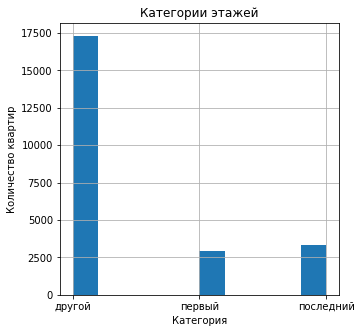

In [52]:
df['categorize_floor'].hist(bins=10,figsize=(5, 5))
plt.title('Категории этажей')
plt.xlabel('Категория')
plt.ylabel('Количество квартир')

Больше всего объявлений ни на первом ни на последнем этаже, но все же квартир на последнем этаже (примерно 3500) встречается больше, чем на первом (примерно 3000). В новых домах, впринципе, реже встречаются жилые первые этажи - это факт.

**Изучим параметр - общее количество этажей в доме, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

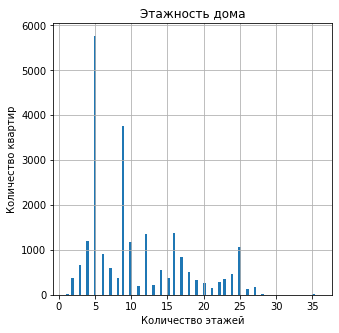

In [53]:
df['floors_total'].hist(bins=100,figsize=(5, 5),range=(1,36))
plt.title('Этажность дома')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')

Самое большое количество квартир продается в 5-ти этажных домах. Далее идути 9-ти этажки, 12-ти и 16-ти этажные дома наравне. Далее идут 10, 4 и 25 этажей. Меньше всего одноэтажных построек и домов более чем с 25 этажами, это логично.

**Изучим параметр - расстояние до центра города в метрах, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

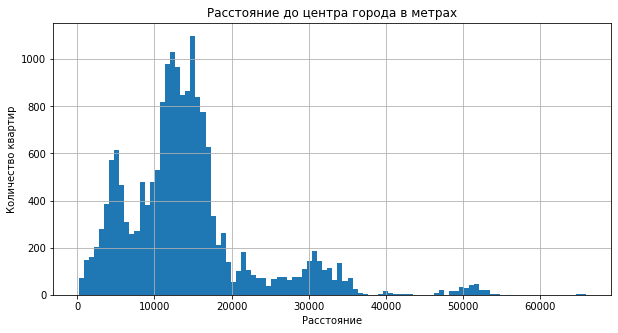

In [54]:
df['city_centers_nearest'].hist(bins=100,figsize=(10, 5))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')

Примерно 100 квартир продавалось в самом центре города, самая далекая от центра недвижимость находится на расстоянии примерно 66000 метров. Наибольшее количество квартир удалено от центра города на расстояние 10000-17000 метров. 

**Изучим параметр - расстояние до ближайшего аэропорта, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

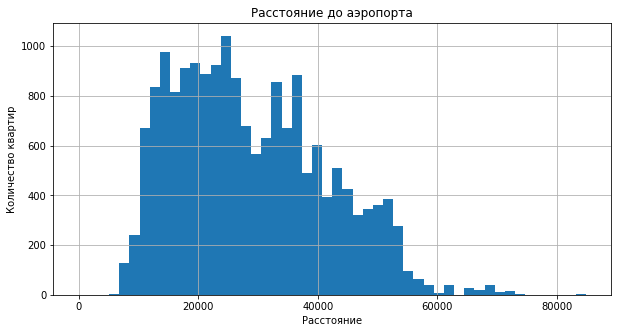

In [55]:
df['airports_nearest'].hist(bins=50,figsize=(10, 5))
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')

Самая ближайшая квартира от аэропорта находится примерно в 7000 метрах, самая дальняя более 85000 метров, в основном до аэропорта от 10000 до 40000 метров.

**Изучим параметр - расстояние до ближайшего парка, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

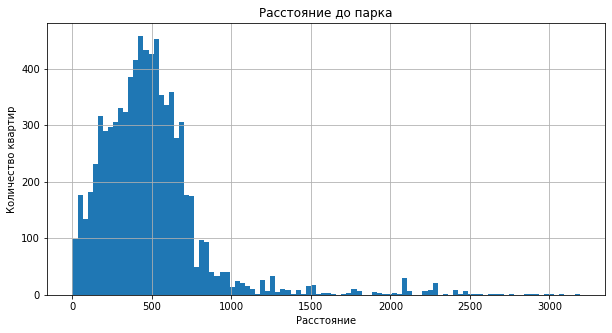

In [56]:
df['parks_nearest'].hist(bins=100,figsize=(10, 5))
plt.title('Расстояние до парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')

У большинства квартир парк находиться не далее 500 метров, очень хороший показатель, на мой взгляд!

**Изучим параметр - день публикации, построим гистограмму.**

Text(0, 0.5, 'Количество квартир')

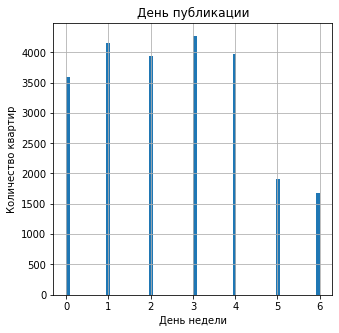

In [57]:
df['weekday'].hist(bins=70,figsize=(5, 5))
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')

Судя по гистограмме, в будни размещается наибольшее количество объявлений о продаже недвижимости. Вторник и четверг самые активные дни, чего нельзя сказать про выходные, особенно про воскресенье, количество размещений падает примерно в 2 раза. 

**Изучим параметр - месяц публикации, построим гистограмму**

Text(0, 0.5, 'Количество квартир')

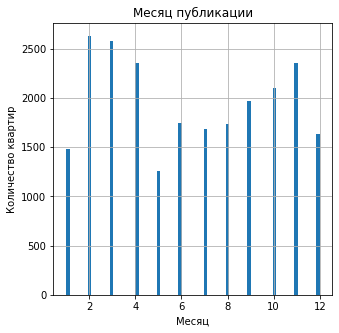

In [58]:
df['month'].hist(bins=70,figsize=(5, 5))
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')

В январе и мае много праздничных дней - по размещению объявлений отнеосительное затишье, логично. Самый пик приходится на февраль, март - погода плохая, праздники закончились - время заняться важными делами. Летние месяц активность снижена, с сентября возрастает до декабря, в декабре опять спад, конец года, опять же другие незаконченные дела и праздники.

**Изучим, как быстро продавались квартиры (столбец days_exposition).**

In [59]:
df['days_exposition'].unique()

<FloatingArray>
[              <NA>,               81.0,              558.0,
              424.0,              121.0,               55.0,
              155.0, 189.00000000000003,              289.0,
              137.0,
 ...
             1032.0,              993.0,             1201.0,
             1130.0,             1052.0,             1187.0,
             1200.0,             1360.0,             1007.0,
              971.0]
Length: 1140, dtype: Float64

Text(0, 0.5, 'Количество квартир')

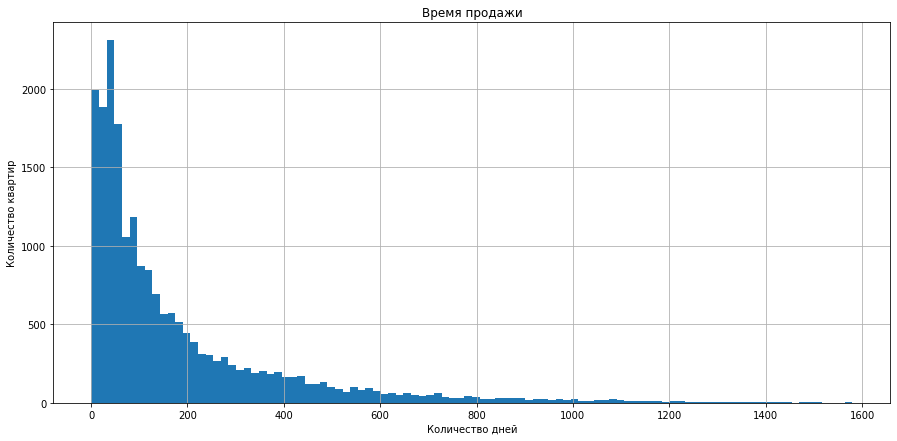

In [60]:
df['days_exposition'].hist(bins=100,figsize=(15, 7))
plt.title('Время продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

In [61]:
(f"Среднее время размещения объявления {df['days_exposition'].mean()} дней") 


'Среднее время размещения объявления 180.82801984575332 дней'

In [62]:
(f"Медианное время размещения объявления {df['days_exposition'].median()} дней")

'Медианное время размещения объявления 95.0 дней'

In [63]:
df.days_exposition.describe()

count    20357.000000
mean       180.828020
std        219.859546
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество квартир')

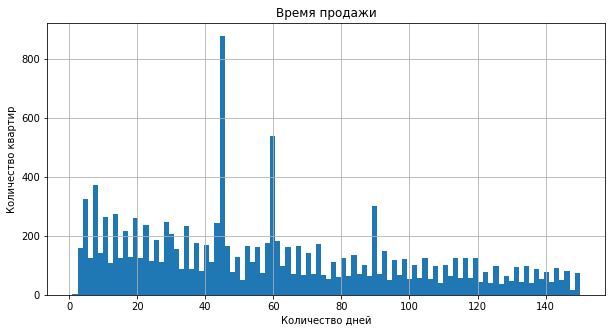

In [64]:
df['days_exposition'].hist(bins=100,figsize=(10, 5), range=(1,150))
plt.title('Время продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

Рассмотрим гистограмму "поближе". Стало видно, что выбиваются значения, похоже это 45,60 и 90 дней. Кажется это могут быть какие-то ограничения по срокам на размещение объявления, после которого оно закрывается автоматически....Может это, например, вип объявления платного характера.

<AxesSubplot:>

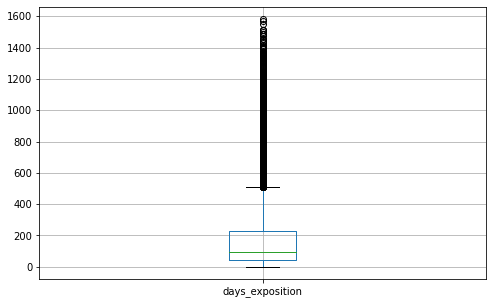

In [65]:
df.boxplot('days_exposition', figsize=(8,5))
#plt.ylim(-100, 500)

Большая часть значений лежит в диапазоне до 230 дней, медиана - 95 дней, а первый квартиль на уровне 40 дней. Нижний ус упирается в 0 - минимальное значение, а верхний на уровне 510 дней (граница нормального размаха), все что выше - выбросы, их довольно-таки много.

На основе проведенного анализа времени продажи квартир может сказать, что среднее время продажи 100 дней, медиана равна 180 за счет того, что у нас много выбросов, возможно эти люди все же продали квартиры раньше, а объявления не закрыли или у них совсем не привлекательные предложения так как они не торопятся с продажей.
Быстрой продажей можем считать срок до 45 дней, а необычно долгими срок более 500 дней.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

Для ответа на вопрос о зависимости стоимости от площадей квартиры создадим сводную таблицу и посторим график для наглядности

In [66]:
df_pivot = df.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area'])
df_pivot.reset_index().head()

,last_price,kitchen_area,living_area,total_area
0,12.19,40.5000,32.000000,109.000000
1,430.00,8.0600,23.250000,42.200000
2,440.00,7.4900,22.590000,40.000000
3,450.00,6.7525,23.085000,40.100000
4,470.00,7.8100,26.966667,40.833333


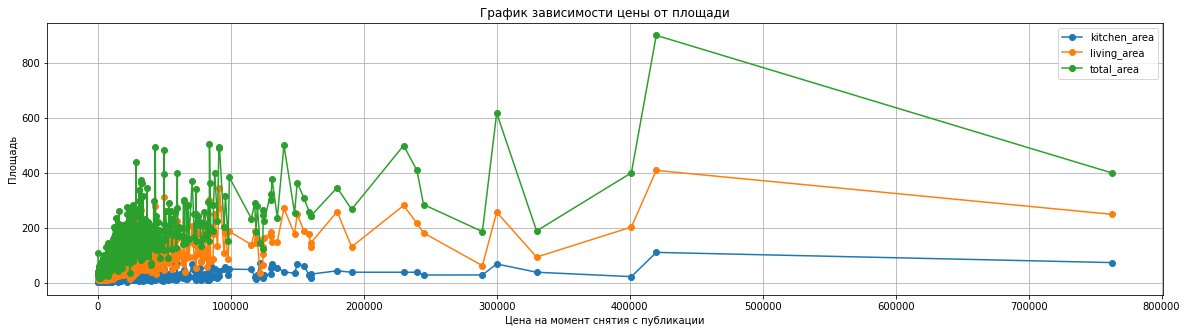

In [67]:
df_pivot.plot(style='o-',grid=True, figsize=(20,5), title='График зависимости цены от площади')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Площадь')
plt.show()

На графике прослеживается линейная зависимость стоимости недвижимости от площади общей, жилой и кухни. Пожалуй, самая не явная зависимоть от площади кухни. Видимо все-таки при покупке квартиры в первую очередь обращают внимание на общую площадь и жилую, большая площадь кухни идет плюсом как дополнение. Рассчитанные ниже коэфициенты корреляции нам это подтверждают.

In [68]:
df['total_area'].corr(df['last_price'])

0.6536978206243063

In [69]:
df['living_area'].corr(df['last_price'])

0.5865455940439492

In [70]:
df['kitchen_area'].corr(df['last_price'])

0.5180529761407349

**Проверим зависимость стоимости недвижимости от количества комнат.**

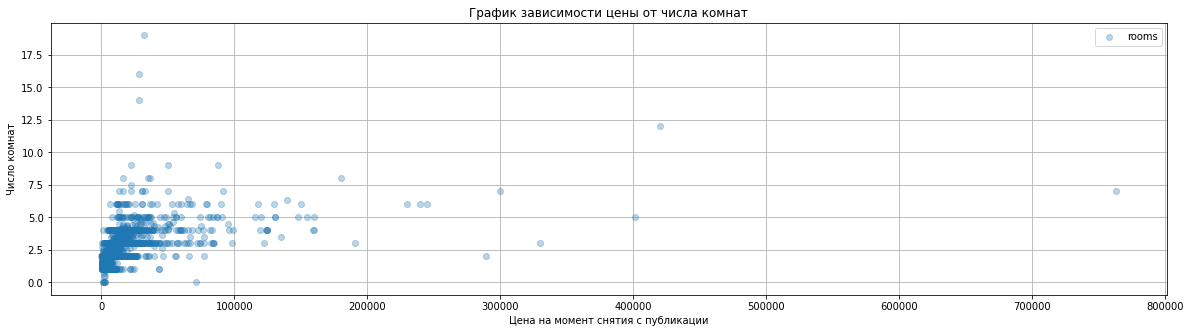

In [71]:
df_pivot = df.pivot_table(index='last_price', values='rooms')
df_pivot.reset_index().head()
df_pivot.plot(style='o',grid=True, figsize=(20,5), alpha = 0.3, title='График зависимости цены от числа комнат')

plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Число комнат')
plt.show()

In [72]:
df['rooms'].corr(df['last_price'])

0.36324467388819115

На графике не наблюдается зависимости цены недвижимости от количества комнат, да и рассчитанный коэфициент корреляции нам это подтверждает.

**Проверим зависимость цены недвижимости от дня недели подачи объявления.**

,mean,count,median
weekday,,,
1,6377.670164,4156,4714.595
2,6632.967994,3939,4700.000
0,6524.617514,3588,4650.000
3,6710.843870,4269,4650.000
4,6360.171742,3978,4550.000
5,6989.290991,1917,4550.000
6,6248.466812,1678,4540.000


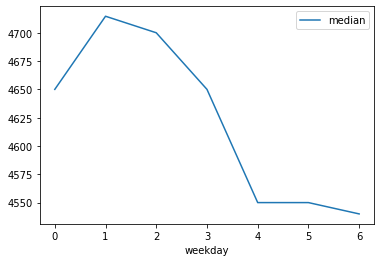

In [73]:
df_pivot_2 =  df.pivot_table(index='weekday', values='last_price', aggfunc =['mean', 'count', 'median'])
df_pivot_2.columns = ['mean', 'count', 'median']
df_pivot_2.plot(y = 'median')
df_pivot_2.sort_values('median', ascending = False)

По понедельникам при подачи объявления цена скажем так средняя, далее при подаче к середине недели цена достигает высокого значения, к концу недели наблюдается спад стоимости.

**Проанализируем зависимость цены на недвижимость от типа этажа, на котором расположена квартира (первый, последний, другой)**

,mean,count,median
categorize_floor,,,
другой,6677.532126,17298,4850.0
последний,7340.396411,3327,4300.0
первый,4809.134483,2900,3900.0


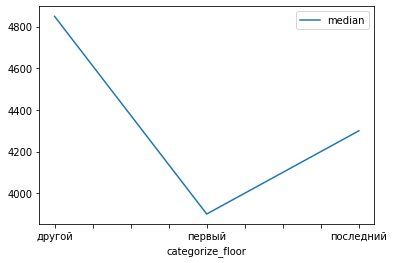

In [74]:
df_pivot_3 =  df.pivot_table(index='categorize_floor', values='last_price', aggfunc =['mean', 'count', 'median'])
df_pivot_3.columns = ['mean', 'count', 'median']
df_pivot_3.plot(y = 'median')
df_pivot_3.sort_values('median', ascending = False)


Самые низкие цены мы наблюдаем на квартиры на первом этаже, цены на последнем этаже тоже значительно ниже, чем цены не на первом и не на последнем этажах. Результаты логичны, общепринято, что для проживания лучшими вариантами раньше были не первый и не последний этаж, но в современных постройках, мне кажется, уже не всегда так, первый этаж часто коммерческий, а последний может быть интересен планировкой.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [75]:
city_top = df['locality_name'].value_counts().head(10) #посмотрим список 10 городов с наибольшим количеством объявлений
city_top

санкт-петербург      15617
мурино                 585
поселок шушары         438
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [76]:
city_square_meter_price = df.query('locality_name in (@city_top.index)').pivot_table(values='price_square_meter', index='locality_name') #найдем стоимость 1 кв метра топа городов, для этого используем срез данных по топу городов, создадим сводную таблицу с ценой за 1 кв метр
city_square_meter_price = city_square_meter_price.astype(int) #приведем данные в целочисленный тип
city_square_meter_price.sort_values('price_square_meter', ascending=False) #выведем результаты в порядке убывания

,price_square_meter
locality_name,
санкт-петербург,114
пушкин,103
деревня кудрово,92
поселок парголово,90
мурино,86
поселок шушары,78
колпино,75
всеволожск,68
гатчина,68


Самая высокая цена за квадратный метр среди городов, где больше всего объявлений о продаже - в Санкт-Петербурге. На втором месте город Пушкин, не удивительно, он довольно-таки близко от СПб и там очень зелено и красиво. Выборг, хоть и тоже замечательный, с красивой природой, но все же слишком далеко от СПб, видимо, поэтому цена за кв метр недвижимости у него самая низкая.

**Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.**

,price_square_meter
city_centers_km,
0.0,246.0
1.0,177.0
2.0,158.0
3.0,121.0
4.0,133.0
5.0,140.0
6.0,150.0
7.0,156.0
8.0,125.0


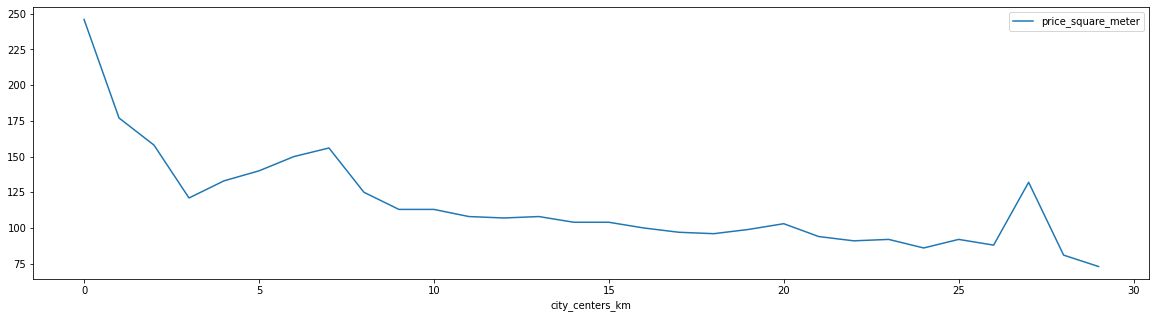

In [77]:
df['city_centers_km']=df['city_centers_km'].round()
city_spb = df.query('locality_name == "санкт-петербург"').pivot_table(index = 'city_centers_km', values = 'price_square_meter', aggfunc = 'mean').round()
city_spb.plot(figsize =(20,5))
city_spb


Мы получили график зависимости цены кв метра недвижимости от расстояния от центра СПб. Можно сказать, что в самом центре и близко к центру стоимость кв метра самая высокая, далее идет постепенное снижение с редкими скачками и примерно на расстоянии 9 км от центра снижение происходит плавнее. На расстоянии 27 км от центра видим скачек стоимости кв метра, скорее всего это какая-то загородная элитная недвижимость в окрестностях СПБ. 

***Общий вывод***
На основе данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах мы провели исследовательский анализ, целью которого было найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
На первом этапе мы выполнили предобработку данных и изучили их, избавились от пропусков: удалили несущественные пропуски в столбцах 'locality_name', 'floors_total'. Заменили на среднее значение пропуски в данных 'celling_heigth', заполнили пропуски в 'living_area' средними данными по общей и жилой площади. Заменили пропуски в 'is_apartment' на False, в 'balcony' на 0. Некоторые столбцы оставили без изменений, в основном в колонках с характеристиками места положения объекта. Так же поработали с аномальными значениями, заменили данные в 'celling_heigth' и удалили некоторые выбросы. В 'floors_total' удалили значения, не свойственные СПБ. В 'living_area' так же удалили аномальные значения. Поработали над типом данных. Явных дубликатов не обнаружили и поработали над неявными дубликатами. После предобработки данных мы сохранили более более 99% от наших данных.

Далее мы посчитали и пополнили данные ценой квадратного метра, днем, месяцем и годом публикации, типом этажа квартиры и расстоянием в км до центра города. Изучили как все эти параметры, а также картографическое положение объекта, площадь, количество комнат, высота потолков вляют на стоимость объекта недвижимости.

Результаты нашего исследования:

1. Чаще всего встречаются объявления о продаже квартир с общей/жилой/кухни площадью примерно 50/30/9 кв метров, очень редко с общей/жилой/кухни площадью более 150/100/20 кв метров. Мы выявили, что  стоимость недвижимости прямо зависит от площади общей, жилой и менее от площади кухни. Видимо, большая площадь кухни идет плюсом как приятное дополнение. 

2. По стоимости больше всего предложений  от 5 млн руб до 8 млн руб, однокомнатные квартиры лидируют в предложениях (8000), далее чуть отстают двухкомнатные (7900), трехкомнатных меньше (5800), четырехкомнатных мало (1200) 5-ти и более совсем мало, менее 4000 каждого вида. Мы не выявили сильной зависимости стоимости недвижимости от количества комнат, видимо зачастую дорогая недвижимость — это просторные помещения, а не множество маленьких комнатушек.

3. Высота потолков варьируется от от 2,7 до 3,2 метров и крайне редко более 4,5 метров. 

4. Больше всего продается квартир на 2 атаже, далее идут- 3,1,4,5. Значительно меньше предложений по 6,7,8,9,10 этажам соответственно. Далее идут наравне 11 и 12 этажи, потом 13, опять наравне 14 и 15,16. После 17 количество предложений стремится с 300 до 0. Больше всего объявлений ни на первом ни на последнем этаже, но все же квартир на последнем этаже (примерно 3500) встречается больше, чем на первом (примерно 3000).Самые низкие цены мы наблюдаем на квартиры на первом этаже, цены на последнем этаже тоже значительно ниже, чем цены не на первом и не на последнем этажах. Результаты логичны, общепринято, что для проживания лучшими вариантами раньше были не первый и не последний этаж, но в современных постройках, мне кажется, уже не всегда так, первый этаж часто коммерческий, а последний может быть интересен планировкой.

5. Самое большое количество квартир продается в 5-ти этажных домах. Далее идути 9-ти этажки, 12-ти и 16-ти этажные дома наравне. Далее идут 10, 4 и 25 этажей. Меньше всего одноэтажных построек и домов более чем с 25 этажами. 

6. Примерно 100 квартир продавалось в самом центре города, самая далекая от центра недвижимость находится на расстоянии примерно 66000 метров. Наибольшее количество квартир удалено от центра города на расстояние 10000-17000 метров. 

7. Несмотря на то, что СПБ — крупный мегаполис, у большинства квартир парк находиться не далее 500 метров.

8. В будни размещается наибольшее количество объявлений о продаже недвижимости. Вторник и четверг самые активные дни, чего нельзя сказать про выходные, особенно про воскресенье, количество размещений падает примерно в 2 раза. В январе и мае много праздничных дней - по размещению объявлений относительное затишье, логично. Самый пик приходится на февраль, март - погода плохая, праздники закончились - время заняться важными делами. Летние месяц активность снижена, с сентября возрастает до декабря, в декабре опять спад, конец года, опять же другие незаконченные дела и праздники.

9. Проанализировав длительность публикации объявлений, можно сказать,что среднее время продажи 100 дней, быстрой продажей можем считать срок до 45 дней, а необычно долгими срок более 500 дней.

10.  Самая высокая цена за квадратный метр среди городов, где больше всего объявлений о продаже - в Санкт-Петербурге(114 тыс). На втором месте город Пушкин(103 тыс), не удивительно, он довольно-таки близко от СПб и там очень зелено и красиво. Выборг, хоть и тоже замечательный, с красивой природой, но все же слишком далеко от СПб, видимо, поэтому цена за кв метр недвижимости у него самая низкая (58 тыс).

11. Мы получили график зависимости цены кв метра недвижимости от расстояния от центра СПб. Можно сказать, что в самом центре и близко к центру стоимость кв метра самая высокая, далее идет постепенное снижение с редкими скачками и примерно на расстоянии 9 км от центра снижение происходит плавнее.

